In [17]:
import pandas as pd
from sklearn.datasets import load_iris

In [18]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [19]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["target"] = iris.target
df["flower_name"] = df.target.apply(lambda x: iris.target_names[x])


df0 = df[df["target"] == 0]
df1 = df[df["target"] == 1]
df2 = df[df["target"] == 2]


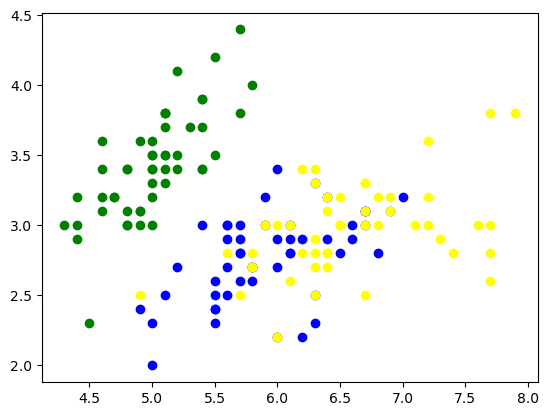

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color = "green")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color = "blue")
plt.scatter(df2["sepal length (cm)"], df2["sepal width (cm)"], color = "yellow")


In [27]:
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 9)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

1.0

In [45]:
from sklearn.model_selection import RandomizedSearchCV
model_params = {
    "KNN":{
        "model":KNeighborsClassifier(),
        "params":{
            "n_neighbors": [i for i in range(1,10)]
        }
    }
}
score = []
for model_name, mp in model_params.items():
    search = RandomizedSearchCV(mp["model"], mp["params"], cv = 5, return_train_score = False, n_iter = 10)
    search.fit(iris.data, iris.target)
    score.append({"model":[model_name], "best score":[search.best_score_], "best parameters":[search.best_params_]})

score


C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[{'model': ['KNN'],
  'best score': [0.9800000000000001],
  'best parameters': [{'n_neighbors': 6}]}]

Text(120.72222222222221, 0.5, 'truth')

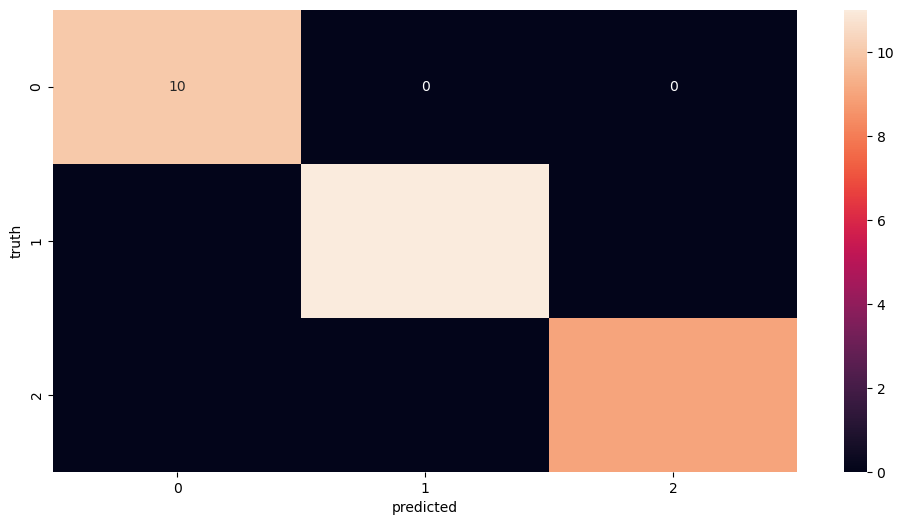

In [47]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)

import seaborn as sns
plt.figure(figsize = (12, 6))
sns.heatmap(confusion_matrix, annot = True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

